In [58]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [59]:
def remove_par(df, feat):
    df[feat] = df[feat].str.replace('(','')
    df[feat] = df[feat].str.replace(')','')
    
def string2int(df, feat):
    df[feat] = df[feat].astype(int)
    
def polish_trade_feature(df, feat):
    remove_par(df, feat)
    string2int(df, feat)

In [60]:
trade = pd.read_csv("trade_reg.csv",sep='\t')

cols_sambanis = ["warstds", "ager", "agexp", "anoc", "army85", "autch98", "auto4",
        "autonomy", "avgnabo", "centpol3", "cowcode", "coldwar", "decade1", "decade2",
        "decade3", "decade4", "dem", "dem4", "demch98", "dlang", "drel",
        "durable", "ef", "ef2", "ehet", "elfo", "elfo2", "etdo4590",
        "expgdp", "exrec", "fedpol3", "fuelexp", "gdpgrowth", "geo1", "geo2",
        "geo34", "geo57", "geo69", "geo8", "illiteracy", "incumb", "infant",
        "inst", "inst3", "life", "lmtnest", "ln_gdpen", "lpopns", "major", "manuexp", "milper",
        "mirps0", "mirps1", "mirps2", "mirps3", "nat_war", "ncontig",
        "nmgdp", "nmdp4_alt", "numlang", "nwstate", "oil", "p4mchg",
        "parcomp", "parreg", "part", "partfree", "plural", "plurrel",
        "pol4", "pol4m", "pol4sq", "polch98", "polcomp", "popdense",
        "presi", "pri", "proxregc", "ptime", "reg", "regd4_alt", "relfrac", "seceduc",
        "second", "semipol3", "sip2", "sxpnew", "sxpsq", "tnatwar", "trade",
        "warhist", "xconst", "year", "country"]

sambanis = pd.read_csv("sambanis_extented.csv", usecols=cols_sambanis)

#keep only the year value for date (drop 1-january, dummy)
#sambanis["year"] = pd.DatetimeIndex(sambanis["year"]).year

#civil_war contains only the observations with a civil war
civil_war = sambanis[sambanis["warstds"]==1]

In [61]:
civil_war['year'] = pd.DatetimeIndex(civil_war['year']).year

In [62]:
civil_war.loc[civil_war["country"]=='Afghanistan'].year.astype(int)



33    1978
Name: year, dtype: int64

In [63]:
def imp_number(df, country, onset=None, buffer=5):
    if onset == None:
        pass
    country_imp = df.loc[trade.recipient == country]
    polish_trade_feature(country_imp, 'no_ordered')
    polish_trade_feature(country_imp, 'year_order')
    
    
    country_imp_pre = country_imp.loc[(country_imp.year_order < onset) & 
                                (country_imp.year_order > onset - buffer)]
    country_imp_post = country_imp.loc[(country_imp.year_order >= onset) & 
                                (country_imp.year_order < onset + buffer)]
    
    pre_onset_order = country_imp_pre['no_ordered'].sum()
    post_onset_order = country_imp_post['no_ordered'].sum()
    
    return pre_onset_order, post_onset_order

In [70]:
trade.recipient

0               Angola
1              Nigeria
2                Congo
3        Guinea-Bissau
4        United States
             ...      
18309           Zambia
18310           Zambia
18311          Liberia
18312           Zambia
18313           Zambia
Name: recipient, Length: 18314, dtype: object

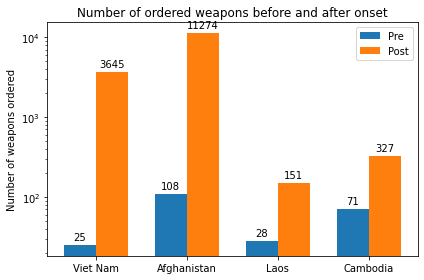

In [101]:
country = ['Viet Nam', 'Afghanistan', 'Laos', 'Cambodia']
onset = [1960, 1978, 1960, 1970]
pre_onset = []
post_onset = []

for c, o in zip(country, onset):
    pre, post = imp_number(trade, c, onset = o, buffer = 5)
    pre_onset.append(pre)
    post_onset.append(post)

labels = country


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, pre_onset, width, label='Pre')
rects2 = ax.bar(x + width/2, post_onset, width, label='Post')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_yscale('log')
ax.set_ylabel('Number of weapons ordered')
ax.set_title('Number of ordered weapons before and after onset')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()